<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Visão Computacional e Processamento de Imagens

Prof. Rilder de Sousa Pires<br>
Aluno: José Freitas Alves Neto<br>
Matricula:2519203<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Baixando Imagem


In [1]:
!gdown 1zWzhOjIfFDU3e4DKq4-1gi-u8LeqDy5G

Downloading...
From: https://drive.google.com/uc?id=1zWzhOjIfFDU3e4DKq4-1gi-u8LeqDy5G
To: /content/6248768.jpg
100% 335k/335k [00:00<00:00, 6.08MB/s]


# Questão 01
- Implemente, utilizando apenas Python e funções da numpy, os filtros de
correlação e convolução apresentados em aula. Mostre que o filtro =
np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]]) aplicado na imagem em escala de
cinza gera as imagens mostradas abaixo:

## Transformando a imagem em escala de cinza


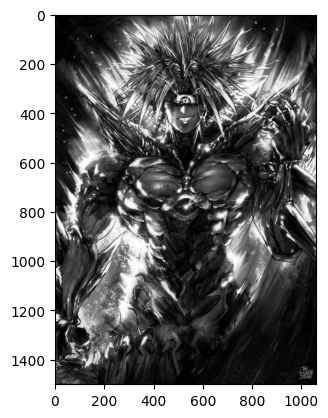

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
imagem = cv2.imread('/content/6248768.jpg')
imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

plt.figur
plt.imshow(imagem,cmap = 'gray')
plt.show()

## Correlação
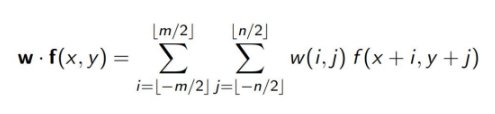

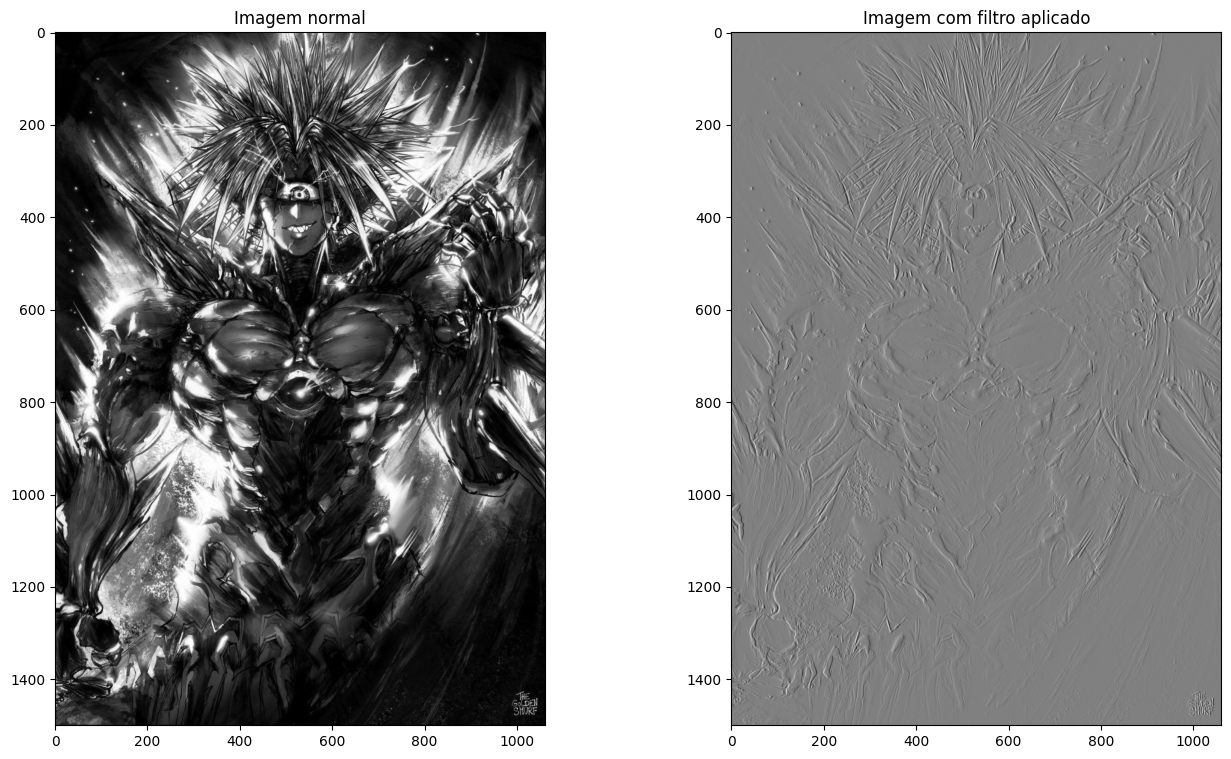

In [22]:
filtro = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

altura_k, largura_k = filtro.shape
pad_h, pad_w = altura_k // 2, largura_k // 2
imagem_pad = np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
resultado_corr = np.zeros_like(imagem, dtype=int)

for y in range(imagem.shape[0]):
    for x in range(imagem.shape[1]):
        regiao = imagem_pad[y:y+altura_k, x:x+largura_k]
        resultado_corr[y, x] = np.sum(regiao * filtro)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem normal')
ax1.imshow(imagem, cmap = 'gray')

ax2.set_title('Imagem com filtro aplicado')
ax2.imshow(resultado_corr, cmap='gray')

plt.show()

## Convolução
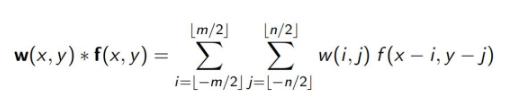

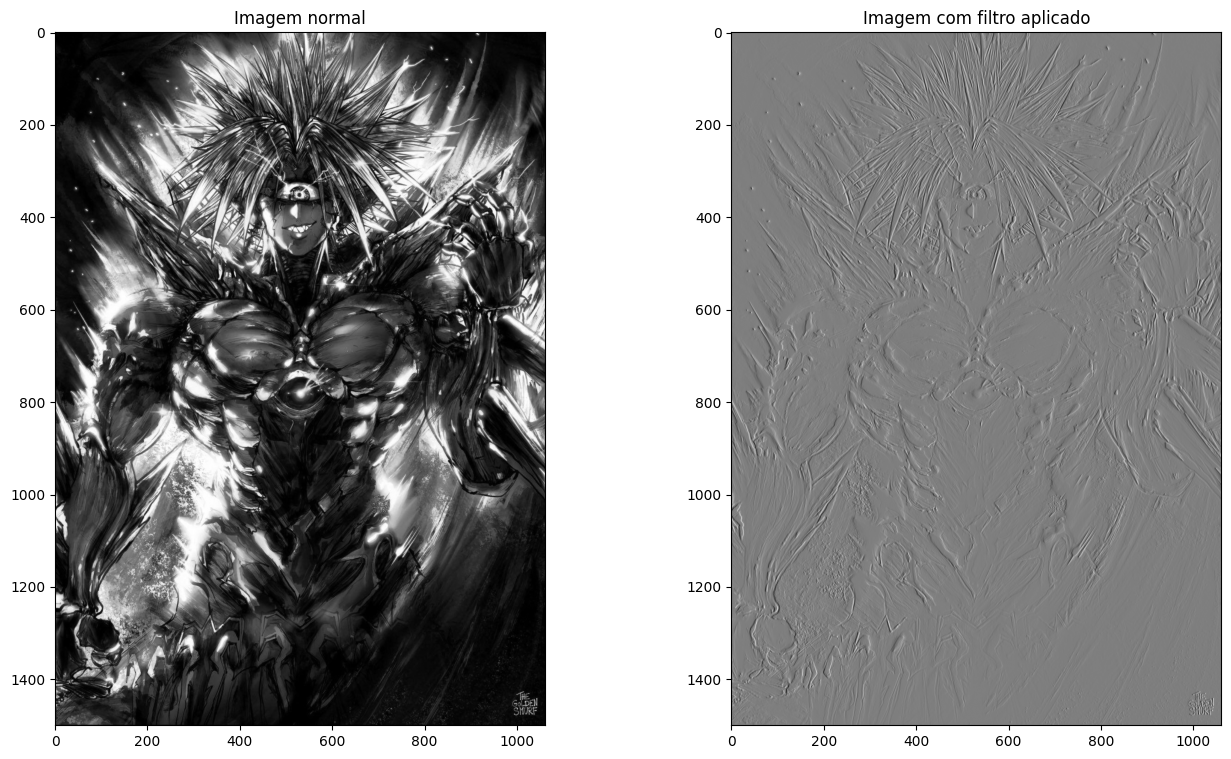

In [23]:
filtro = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

altura_k, largura_k = filtro.shape
pad_h, pad_w = altura_k // 2, largura_k // 2
imagem_pad = np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)

resultado_conv = np.zeros_like(imagem, dtype=float)

for y in range(imagem.shape[0]):
    for x in range(imagem.shape[1]):
        soma = 0.0
        for u in range(-pad_h, pad_h + 1):
            for v in range(-pad_w, pad_w + 1):
                pixel = imagem_pad[y + pad_h + u, x + pad_w + v]
                peso  = filtro[pad_h - u, pad_w - v]
                soma += pixel * peso
        resultado_conv[y, x] = soma

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem normal')
ax1.imshow(imagem, cmap = 'gray')

ax2.set_title('Imagem com filtro aplicado')
ax2.imshow(resultado_conv, cmap='gray')

plt.show()

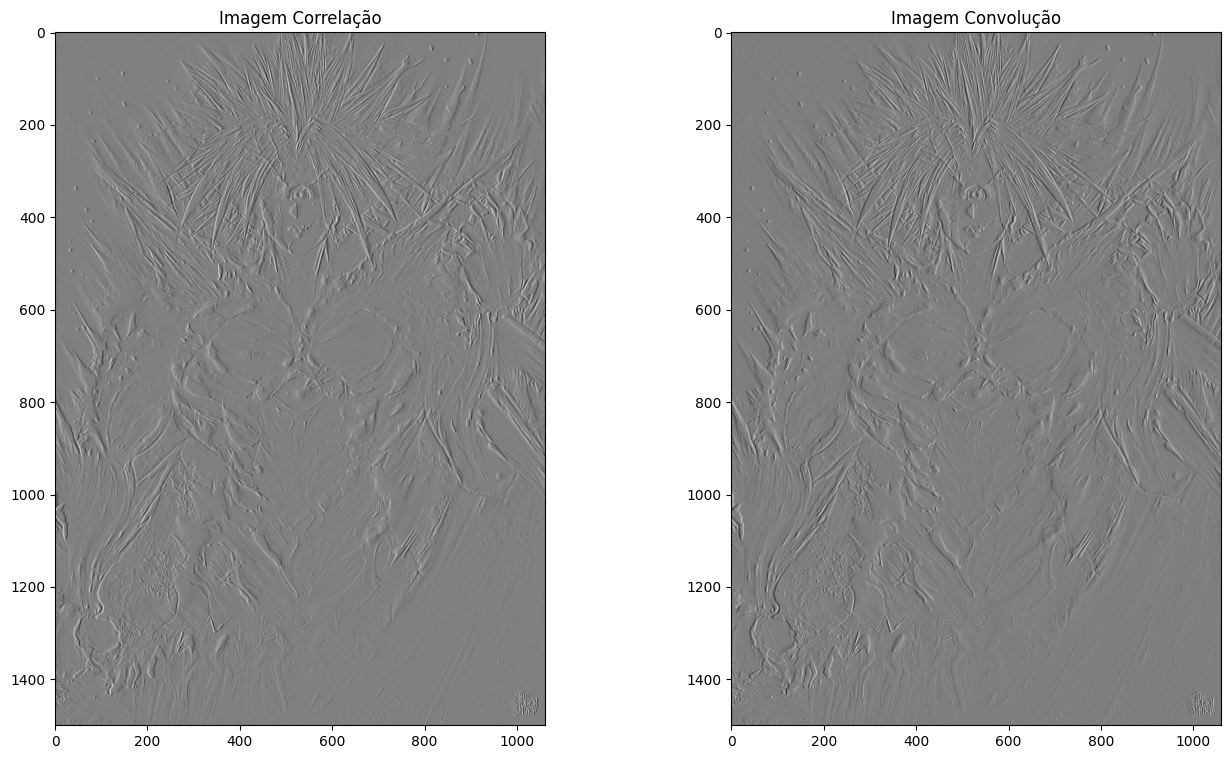

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.set_title('Imagem Correlação')
ax1.imshow(resultado_corr, cmap = 'gray')

ax2.set_title('Imagem Convolução')
ax2.imshow(resultado_conv, cmap='gray')

plt.show()